In [1]:
import numpy as np
import pandas as pd

import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# Data load 
df = pd.read_csv("train.csv")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# preprocessing 

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

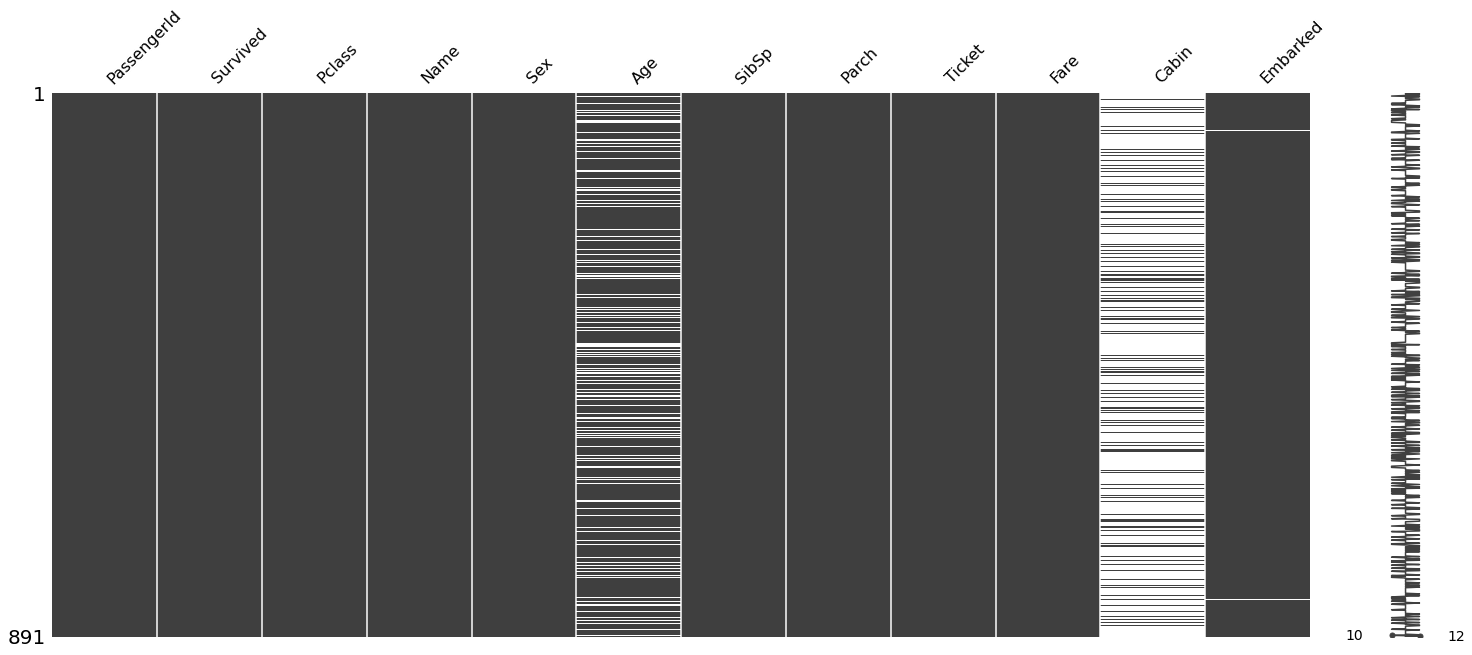

In [4]:
msno.matrix(df)

In [5]:
# check Age

# i will use median values to put Nan of Age 

Age_median = df["Age"].median()

df["Age"] = df["Age"].fillna(Age_median)
df["Age"].isnull().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# I think is seat number and 
# I can't fill Nan values because seat Numbers has no same num or sign 
# so drop it 

df["Cabin"]
df = df.drop(columns = "Cabin")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
Embarked = df["Embarked"]
y = df["Embarked"].groupby(Embarked).size()
x = ['C','Q','S']

<BarContainer object of 3 artists>

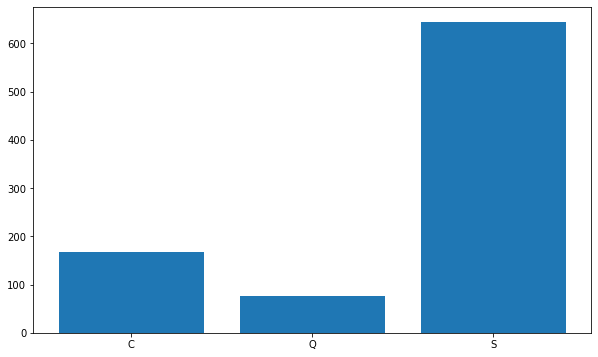

In [9]:
# Embarked Data is seat class 
# so decide put mode num beacuse think airplane eco class
# Embarked Data's Mode is 'S'
plt.bar(x, y)

In [10]:
# put 's' in Nan of df["Embarked"]
df["Embarked"] = df["Embarked"].fillna('S')

In [11]:
# check NAN again
df.isnull().sum()
# CLEAR!!

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Now predict 'Survival' 

In [12]:
# titanic Data has two type of Data
# 1. int 2. str 
# so first with only int data we preceed the Predict 
# Second add str and preceed the Predict

In [13]:
# only int Data 
df_int = df[["Pclass","Age","SibSp","Parch","Fare","Survived"]]
df_int.head(2)

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1


In [14]:
# for Data predict 
# we don't want oversampling
# So I split the data 4 parts(train_x, train_y , test_x, test_y) and mix the Data Randomly

In [15]:
# int Data split
df1_x = df_int.drop(columns = ["Survived"])
df1_y = df_int["Survived"]
train_x1 , test_x1 ,train_y1 , test_y1 = train_test_split(df1_x,df1_y , test_size = 0.2 , random_state = 444)


In [16]:
# 1st modeling(D_Tree) with int data base 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(train_x1,train_y1)
pred_y = model.predict(test_x1)
print(model.predict(test_x1))

print("테스트 점수는 {} 입니다".format(model.score(test_x1, test_y1)))

[1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1]
테스트 점수는 0.7262569832402235 입니다


In [17]:
# Add str in Data 
# To add str Data i want to one-hot encoding 
# so preceed FullRank one-hot encoding 
df_all = df[["Pclass","Age","SibSp","Parch","Fare","Survived","Sex","Embarked"]]

# str data in titanic 
#      - "Age" and "Embarked"
oh_sex = pd.get_dummies(df["Sex"])
df_all["Sex"] = oh_sex

oh_embarked = pd.get_dummies(df["Embarked"])
df_all["Embarked"] = oh_embarked


# All Data split 
df2_x = df_all.drop(columns = ["Survived"])
df2_y = df_all["Survived"]
train_x2 , test_x2 ,train_y2 , test_y2 = train_test_split(df2_x,df2_y , test_size = 0.2 , random_state = 444)

<ipython-input-17-d87128b9a926>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["Sex"] = oh_sex
<ipython-input-17-d87128b9a926>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["Embarked"] = oh_embarked


In [18]:
# 1st modeling(D_Tree) with all data base 

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(train_x2,train_y2)
pred_y = model.predict(test_x2)
print(model.predict(test_x2))

print("테스트 점수는 {} 입니다".format(model.score(test_x2, test_y2)))

[1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1]
테스트 점수는 0.8603351955307262 입니다


# final test score : 0.86

In [20]:
# next use Random Forest or Xgboost